In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
num_col=df.columns.tolist()

In [4]:
num_col=[i.split('(')[0][:-1:] for i in num_col]

In [5]:
df.columns=num_col

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.isna().sum()

Cement                          0
Blast Furnace Slag              0
Fly Ash                         0
Water                           0
Superplasticizer                0
Coarse Aggregate                0
Fine Aggregate                  0
Age                             0
Concrete compressive strengt    0
dtype: int64

In [8]:
df.duplicated().sum()

25

In [9]:
df[df.duplicated()]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strengt
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


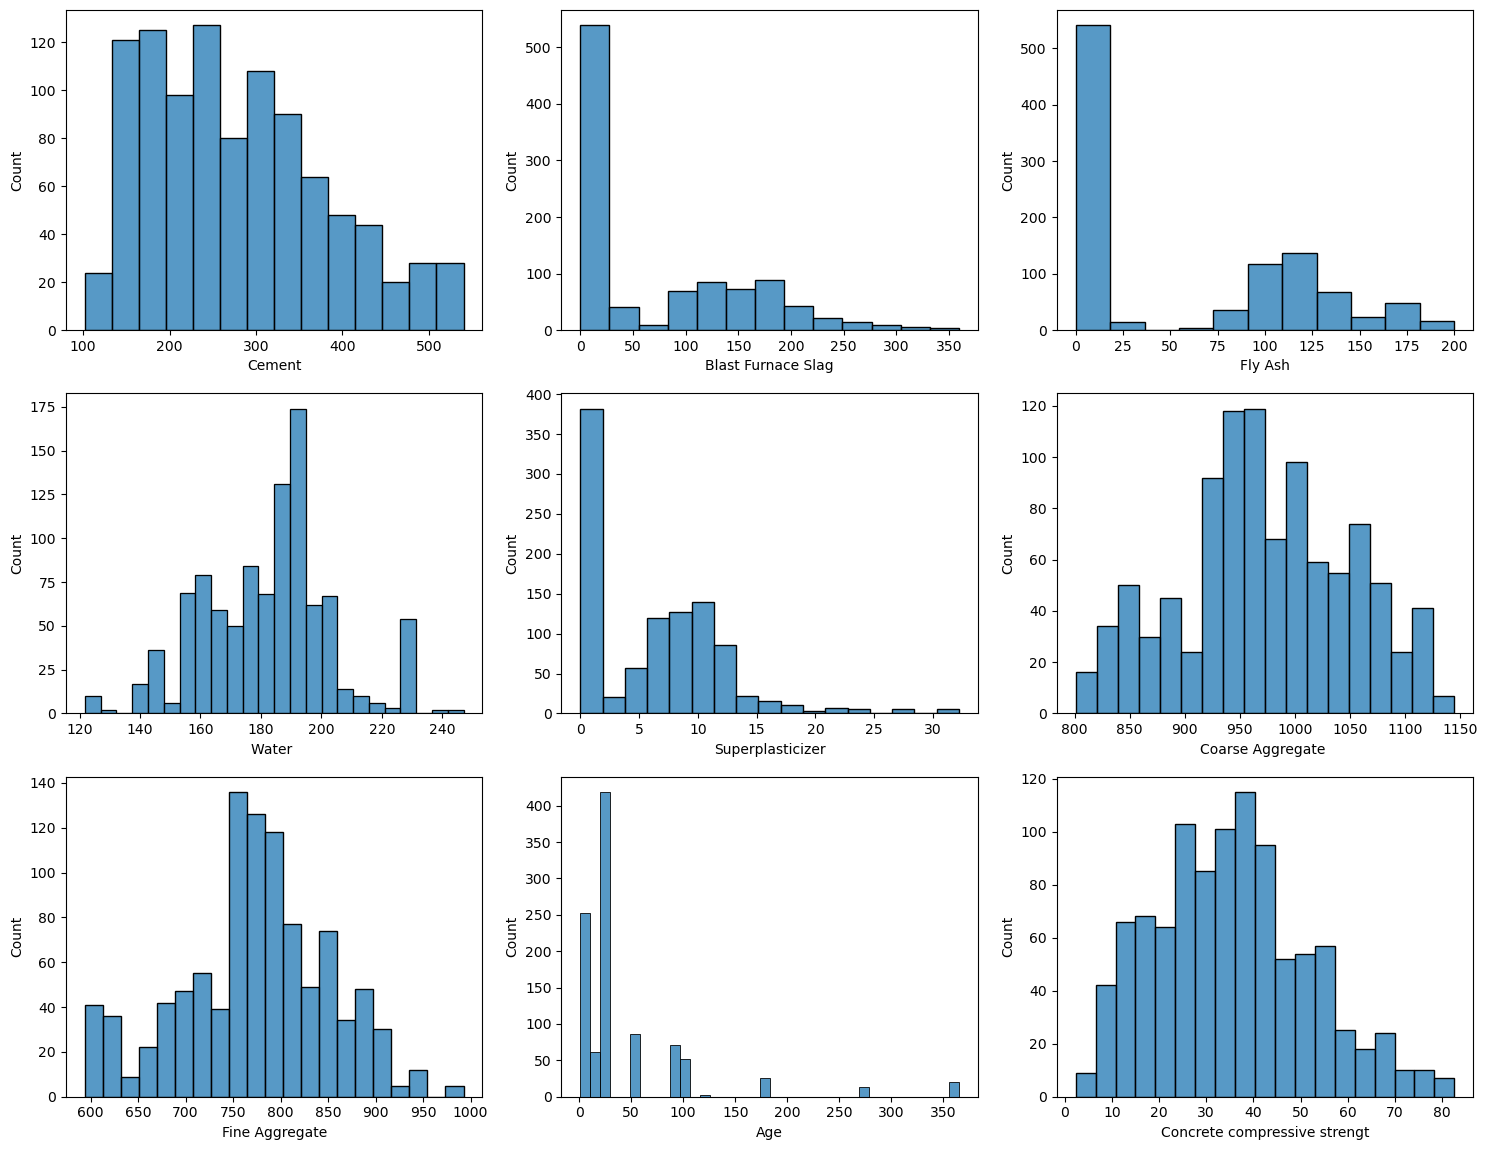

In [19]:
plt.figure(figsize=(15,15),facecolor='white')
plot=1
for i in df.columns.tolist():
    ax=plt.subplot(4,3,plot)
    sns.histplot(df[i])
    plt.xlabel(i,fontsize=10)
    plot+=1
plt.tight_layout()
plt.show()

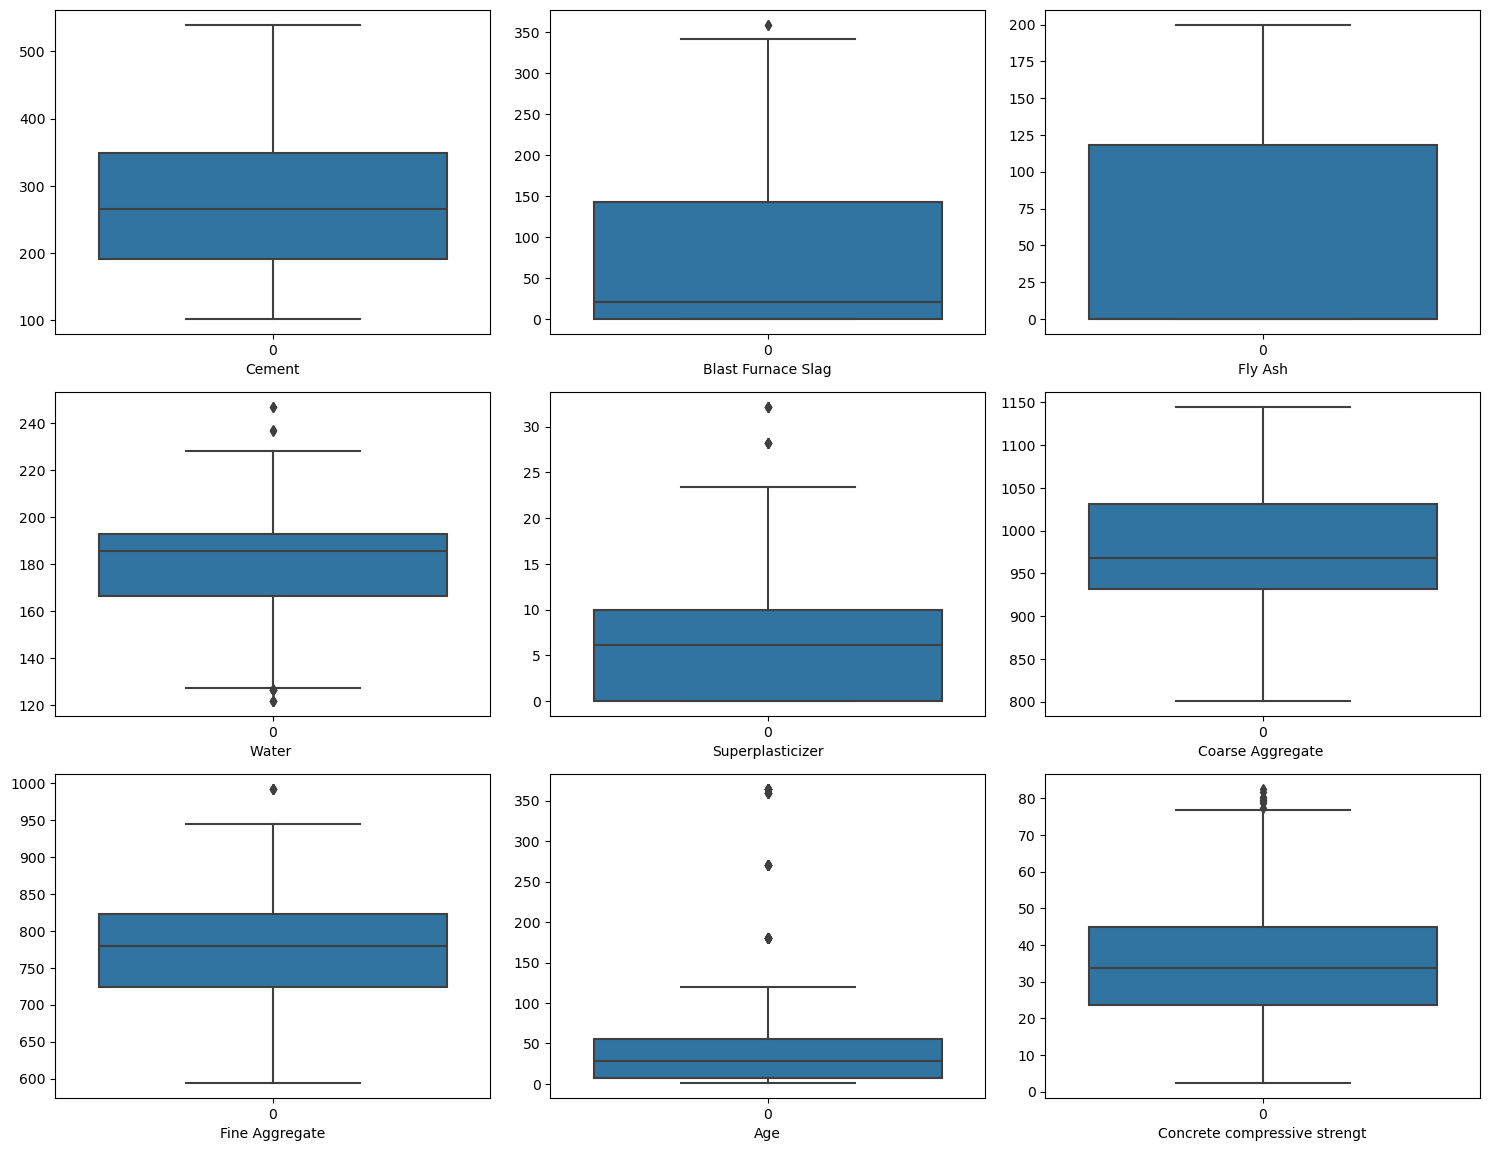

In [20]:
plt.figure(figsize=(15,15),facecolor='white')
plot=1
for i in df.columns.tolist():
    ax=plt.subplot(4,3,plot)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    plot+=1
plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water ', 'Superplasticizer',
       'Coarse Aggregate ', 'Fine Aggregate', 'Age',
       'Concrete compressive strengt'],
      dtype='object')

In [23]:
outliers=['Blast Furnace Slag','Water ','Superplasticizer','Concrete compressive strengt','Age','Fine Aggregate']

In [32]:
def outlier_capping(df:pd.DataFrame,outliers:list):
    for i in df.columns:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upp_limit=q3+iqr*1.5
        low_limit=q1-iqr*1.5
        df.loc[df[i]>upp_limit,i]=upp_limit
        df.loc[df[i]<low_limit,i]=low_limit
    return df

In [33]:
df=outlier_capping(df,outliers)

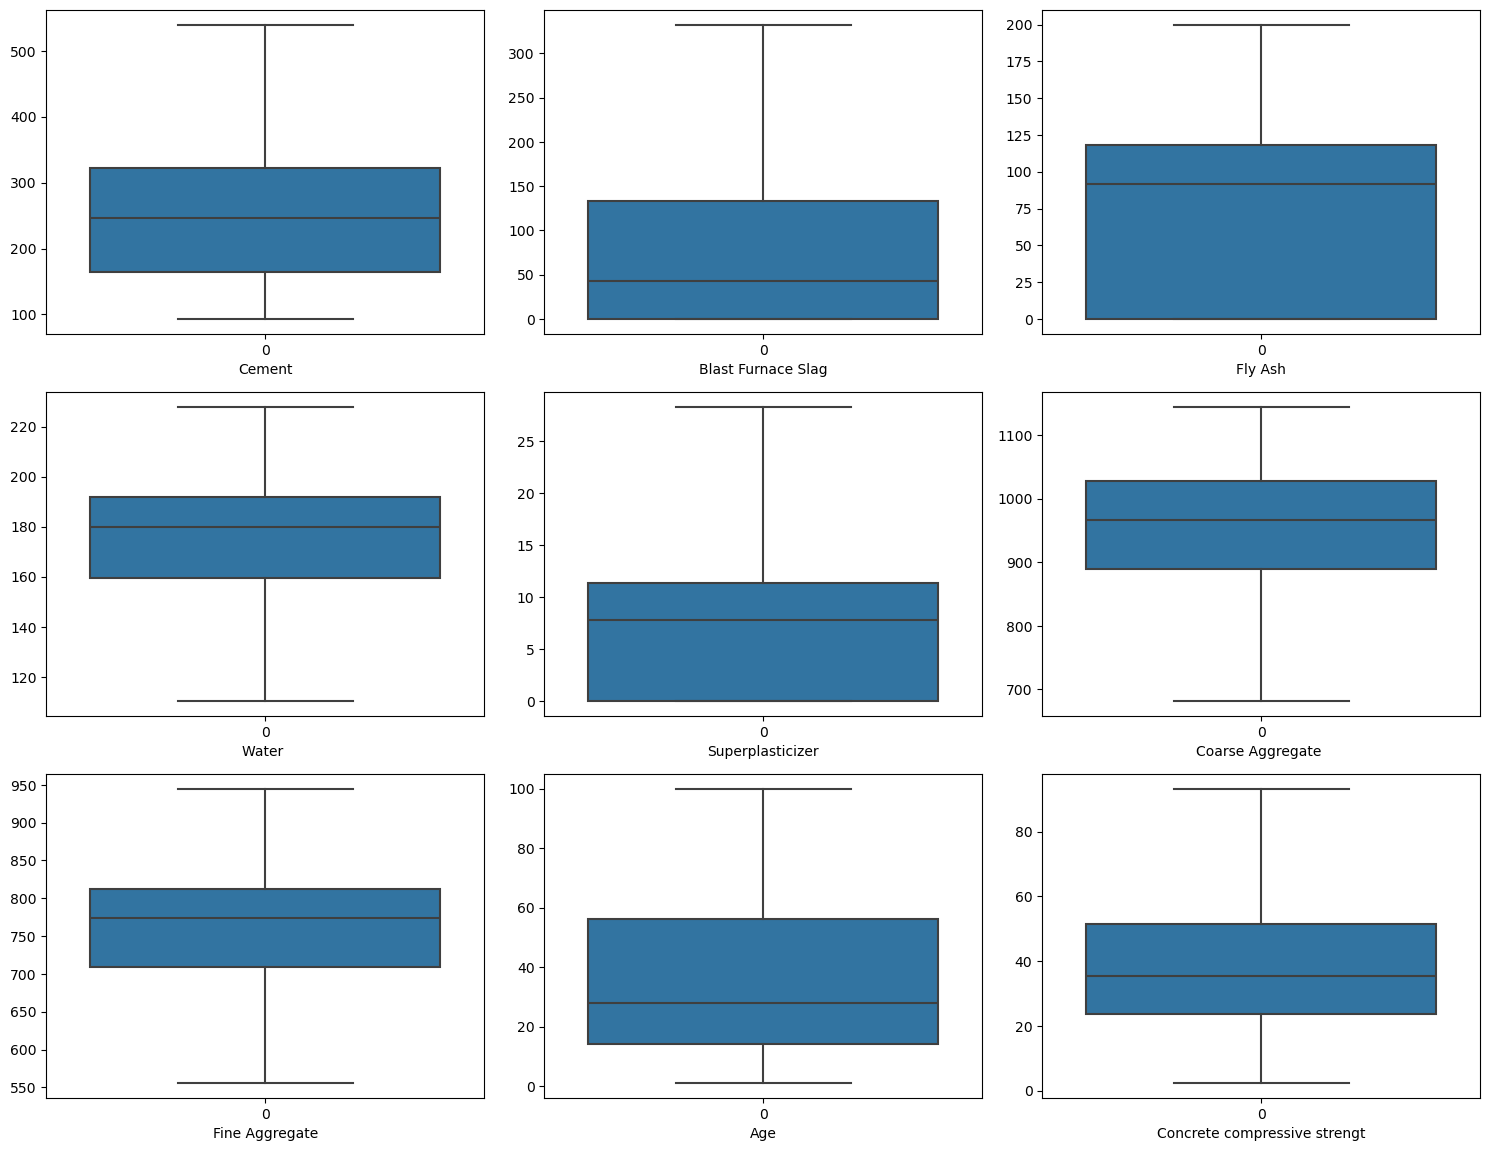

In [34]:
plt.figure(figsize=(15,15),facecolor='white')
plot=1
for i in df.columns.tolist():
    ax=plt.subplot(4,3,plot)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    plot+=1
plt.tight_layout()
plt.show()

In [42]:
X=df.drop('Concrete compressive strengt',axis=1)
y=df['Concrete compressive strengt']

In [43]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.000000,0.000000,0.000000,162.000,2.500,1040.0,676.00,28.000000
1,540.000000,0.000000,0.000000,162.000,2.500,1055.0,676.00,28.000000
2,93.299892,93.299892,93.299892,110.375,28.325,681.9,555.75,93.299892
3,93.299892,93.299892,93.299892,110.375,28.325,681.9,555.75,93.299892
4,93.299892,93.299892,93.299892,110.375,28.325,681.9,555.75,93.299892
...,...,...,...,...,...,...,...,...
1000,276.400000,116.000000,90.300000,179.600,8.900,870.1,768.30,28.000000
1001,322.200000,0.000000,115.600000,196.000,10.400,817.9,813.40,28.000000
1002,148.500000,139.400000,108.600000,192.700,6.100,892.4,780.00,28.000000
1003,159.100000,186.700000,0.000000,175.600,11.300,989.6,788.90,28.000000


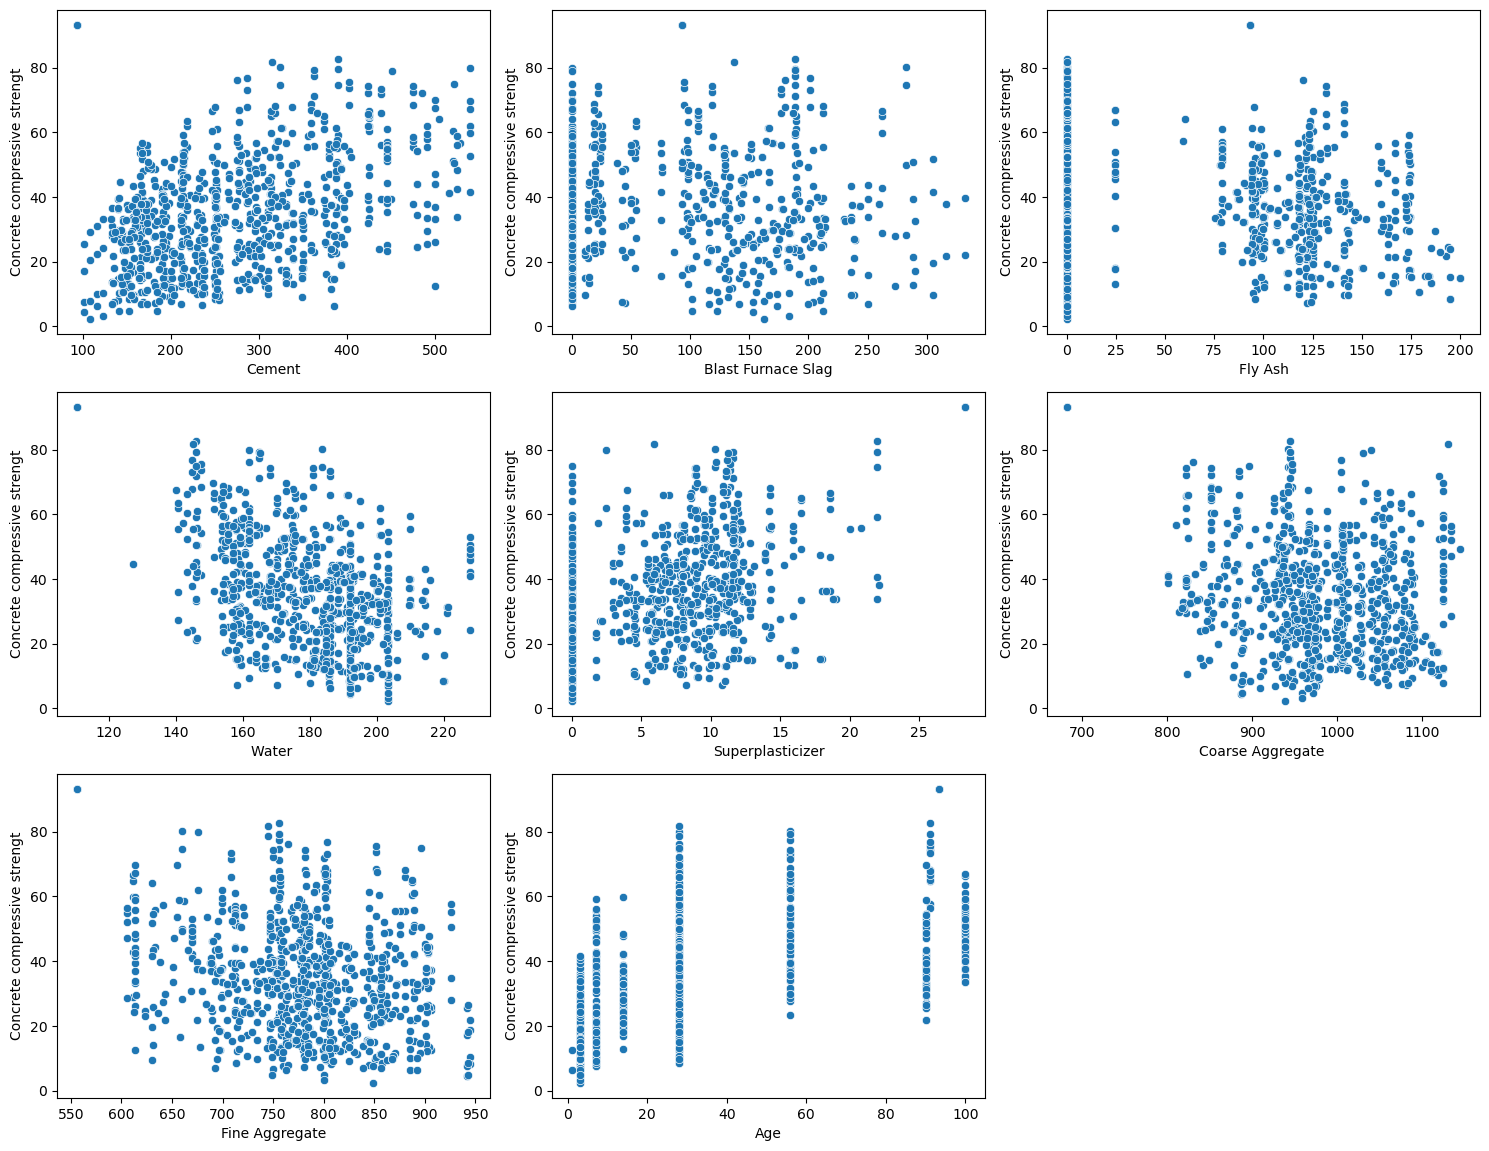

In [44]:
plt.figure(figsize=(15,15),facecolor='white')
plot=1
for i in X.columns.tolist():
    ax=plt.subplot(4,3,plot)
    sns.scatterplot(x=df[i],y=y)
    plt.xlabel(i,fontsize=10)
    plot+=1
plt.tight_layout()
plt.show()

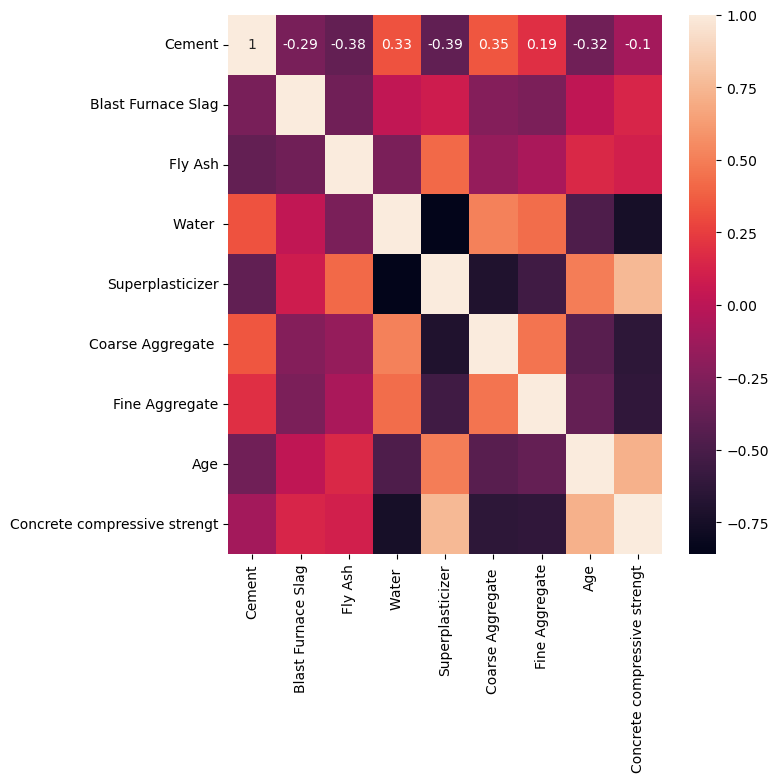

In [49]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split as tts

In [52]:
Xtr,Xte,ytr,yte=tts(X,y,random_state=42,test_size=0.3)

In [53]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [54]:
from sklearn.ensemble  import RandomForestRegressor,GradientBoostingRegressor

In [55]:
from sklearn.impute import KNNImputer

In [56]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

In [57]:
from sklearn.pipeline import make_pipeline

In [58]:
from sklearn.metrics import mean_squared_error,r2_score

In [71]:
def check_model(preprocessor,Xtr,Xte,ytr,yte):
    models={
        'linear reg':LinearRegression(),
        'Ridge':Ridge(alpha=0.1),
        'Lasso':Lasso(alpha=0.1),
        'Random Forest':RandomForestRegressor(max_depth=5),
        'Gradient Boost':GradientBoostingRegressor(learning_rate=0.1)
    }
    for name,model in models.items():
        pipeline=make_pipeline(preprocessor,model)
        pipeline.fit(Xtr,ytr)
        y_pred=pipeline.predict(Xte)
        mse=mean_squared_error(y_pred,yte)
        r2=r2_score(y_pred,yte)
        print(f'MSE of {name}: {mse:.2f}')
        print(f'R2 of {name}: {r2:.2f}\n')

In [72]:
pre1=make_pipeline(KNNImputer(n_neighbors=3),StandardScaler())
pre2=make_pipeline(KNNImputer(n_neighbors=3),MinMaxScaler())
pre3=make_pipeline(KNNImputer(n_neighbors=3),RobustScaler())

In [73]:
print(f'{"="*10} Result for StandardScaler {"="*10}')
check_model(pre1,Xtr,Xte,ytr,yte)

print(f'{"="*10} Result for MinMaxScaler {"="*10}')
check_model(pre2,Xtr,Xte,ytr,yte)

print(f'{"="*10} Result for RobustScaler {"="*10}')
check_model(pre3,Xtr,Xte,ytr,yte)

========== Result for StandardScaler ==========
MSE of linear reg: 69.84
R2 of linear reg: 0.87

MSE of Ridge: 69.84
R2 of Ridge: 0.87

MSE of Lasso: 69.91
R2 of Lasso: 0.87

MSE of Random Forest: 60.37
R2 of Random Forest: 0.87

MSE of Gradient Boost: 29.05
R2 of Gradient Boost: 0.95

========== Result for MinMaxScaler ==========
MSE of linear reg: 69.84
R2 of linear reg: 0.87

MSE of Ridge: 69.87
R2 of Ridge: 0.87

MSE of Lasso: 71.42
R2 of Lasso: 0.86

MSE of Random Forest: 59.56
R2 of Random Forest: 0.88

MSE of Gradient Boost: 29.05
R2 of Gradient Boost: 0.95

========== Result for RobustScaler ==========
MSE of linear reg: 69.84
R2 of linear reg: 0.87

MSE of Ridge: 69.84
R2 of Ridge: 0.87

MSE of Lasso: 70.06
R2 of Lasso: 0.87

MSE of Random Forest: 59.56
R2 of Random Forest: 0.88

MSE of Gradient Boost: 29.07
R2 of Gradient Boost: 0.95



In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
params={
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.01],
    'max_depth':[3,7],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2,3]
}

In [76]:
gboost=GradientBoostingRegressor()

In [77]:
grid=GridSearchCV(estimator=gboost,param_grid=params,cv=5,verbose=3,scoring='neg_mean_squared_error')

In [78]:
grid.fit(Xtr,ytr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-26.889 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-19.401 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-24.753 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-25.104 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-24.048 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-24.585 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=3)

In [79]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [80]:
grid.best_score_

-20.379090068784887

In [82]:
grid.best_estimator_.score(Xte,yte)

0.9573448440824402

In [83]:
best_model=grid.best_estimator_
y_pred=best_model.predict(Xte)

In [86]:
r2_score(y_pred,yte)

0.9539233457939059